# Overview

For this task same dataset *pendigits* as before was choosen. It is a Pen-Based Recognition of Handwritten Digits Data Set from LIBSVM.

The set is split into two files, learning set of 7,494 samples, and testing one of 3,498 samples. In order to randomize datasets, in this exercise only learning set will be used, and randomly split into new learning and testing set.

There are 10 classes across the dataspace.

# Data upload and split

In [62]:
#Load dataset
from sklearn import datasets

pendings = datasets.load_svmlight_file('/content/pendigits.txt')
target = pendings[-1]
data = pendings[0]

# Split data in train and test data
# A random permutation, to split the data randomly
import numpy as np

# np.random.seed(0)
# indices = np.random.permutation(len(data))
# X_train = data[indices[:-10]]
# y_train = target[indices[:-10]]
# X_test  = data[indices[-10:]]
# y_test  = target[indices[-10:]]

data = data.toarray()

# alternatively:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=0)

# Naive Bayes classifier

This section presents results for naive Bayes classifier used for learning and prediction.

In [63]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3747 points : 462


# Decission Tree classifier

This section presents results for Decission Tree classifier used for learning and prediction.

Number of mislabeled points out of a total 3747 points : 194


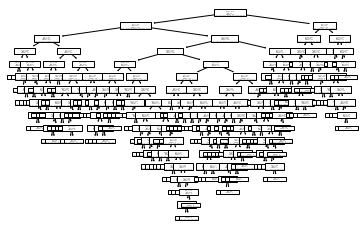

In [64]:
from sklearn import tree

# Training
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Display tree
tree.plot_tree(clf)

# Predicting
y_pred = clf.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

# Multilayer perceptron classifier

This section presents results for multilayer perceptron classifier used for learning and prediction.

In [65]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))


clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Number of mislabeled points out of a total 3747 points : 2083
Number of mislabeled points out of a total 3747 points : 601


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Summary

Among classifiers best results were achieved by Decision Tree, then Naive Bayes classifier, and finally Multilayer perceptron classifiers. Hovever, those last ones may have performed better given higher number of iterations.